# 睡眠与健康关系研究

## 简介
本研究基于回归森林模型，分析了影响睡眠质量的关键因素及其重要性排序，旨在为改善睡眠提供科学依据。模型结果显示，压力水平（重要性分数0.1943）是睡眠质量的最强预测因子，其次是年龄、心率、身体活动水平和每日步数。根据这些发现，研究提出了针对不同影响因素的个性化干预策略，涵盖压力管理、年龄分层干预、心血管健康优化、科学运动方案及行为调整等方面。



## 项目过程
1. 数据建模：

 - 采用回归森林模型量化各因素对睡眠质量的影响权重，重要性排序为：压力水平 > 年龄 > 心率 > 身体活动水平 > 每日步数。

2. 关键发现解读：

 - 压力水平：高压力直接导致入睡困难和睡眠碎片化。

 - 年龄：不同年龄段睡眠问题差异显著（如年轻人熬夜、老年人深睡眠减少）。

 - 心率和活动水平：静息心率过高和运动不足与睡眠质量负相关。

3. 策略设计：

 - 结合预测因子的重要性分数，制定分层次、分人群的干预方案，并设定可量化的监测指标（如压力量表得分、深睡眠时长等）。

## 项目成果与策略建议
核心成果
- 明确压力管理为睡眠改善的首要干预目标（贡献度19.43%），年龄因素次之（14.77%）。

- 提出多维度解决方案，涵盖心理干预（冥想、心理咨询）、生理调节（运动、呼吸训练）、环境优化（卧室温度、光照）及行为习惯调整（步数激励、咖啡因控制）。

| 影响因素       | 优先级 | 关键干预措施                                                                 | 监测指标                          |
|----------------|--------|------------------------------------------------------------------------------|-----------------------------------|
| **压力水平**   | 最高   | 正念冥想APP、职场压力课程、卧室环境优化（温度18-22℃）                       | PSS-10量表、心率变异性（HRV）     |
| **年龄分层**   | 高     | 年轻人：咖啡因控制；中年人：镁剂补充；老年人：限制午睡+日光照射              | 深睡眠比例（手环数据）            |
| **心率**       | 中     | 有氧运动（每周150分钟）、4-7-8呼吸法                                         | 晨起静息心率、夜间平均心率        |
| **身体活动水平** | 中低   | 优选瑜伽/太极、避免睡前6小时高强度运动                                       | 睡眠潜伏期、深睡眠增幅            |
| **每日步数**   | 低     | 站立会议、家庭集体散步、步数排行榜激励                                       | 步数与睡眠效率相关性              |

实施重点
- 精准分层：针对不同年龄、职业人群设计差异化方案（如IT从业者优先压力管理）。

- 技术整合：利用可穿戴设备（如手环）实时监测心率、步数和睡眠分期数据。

- 行为可持续性：通过社交激励（步行小组）和渐进式目标（步数递增）提升长期依从性。

**结论：**该研究通过数据驱动的方法，为睡眠质量改善提供了系统性策略，优先解决高影响力因素（如压力），同时兼顾个体差异，可实现更高效的睡眠健康管理。

## 第一步：探索数据

### 1. 导入Python的`pandas`和`numpy`库

In [1]:
import pandas as pd
import numpy as np

### 2. 加载数据集

In [2]:
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', on_bad_lines='skip')

### 3. 预览数据前5行

In [3]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic BP,Diastolic BP,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea


### 4. 显示每列的数据类型

In [4]:
sleep_data.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Systolic BP,int64


## 第二步：模型准备，数据清洗

### 5. 统计`sleep_data`中有空值`NaN`或`None`的列，打印占比

In [5]:
# 计算空值占比（百分比）
null_percentage = (sleep_data.isna().mean() * 100).round(2)

# 只显示有空值的列
null_percentage = null_percentage[null_percentage > 0]

print("各列空值占比（%）：")
print(null_percentage)

各列空值占比（%）：
Sleep Disorder    58.56
dtype: float64


**空值占比解析：**
- Sleep Disorder 列包含空值（占比 58.56%）
其中`None`含义表示没有睡眠障碍。
- 其他列均无缺失值。

### 6. 定义目标变量和预测变量
- 目标变量：睡眠质量`Quality of Sleep`
- 预测变量：

| 变量名                 | 数据类型   | 取值范围/类别说明                     | 处理建议                          |
|------------------------|------------|---------------------------------------|-----------------------------------|
| Gender                 | object     | 男/女                                 | 独热编码                          |
| Age                    | int64      | 正整数（如18-80岁）                   | 直接使用，可标准化                |
| Occupation             | object     | 职业名称（如"医生"、"律师"等）        | 独热编码（类别多时可嵌入）        |
| Sleep Duration         | float64    | 小时数                                | 直接使用，可标准化                |
| Physical Activity Level| int64      | 30-90                                 | 按有序数值处理                    |
| Stress Level           | int64      | 可能为3-8评分（1=低压力，10=高压力）  | 按有序数值处理                    |
| BMI Category           | object     | "Normal", "Normal Weight", "Obese", "Overweight" | 序数编码（按健康程度排序） |
| Systolic BP            | int64      | 收缩压（如90-180 mmHg）               | 直接使用，注意异常值              |
| Diastolic BP           | int64      | 舒张压（如60-120 mmHg）               | 直接使用，注意异常值              |
| Heart Rate             | int64      | 静息心率（如65-86 bpm）               | 直接使用                          |
| Daily Steps            | int64      | 每日步数（如3000-10000步）            | 直接使用，可对数变换              |
| Sleep Disorder         | object     | "None", "Insomnia", "Sleep Apnea"等   | 独热编码                          |

### 7. 对`BMI Category`列进行序数编码

In [6]:
from sklearn.preprocessing import OrdinalEncoder
# (1) BMI Category（有序类别，使用 OrdinalEncoder）
bmi_order = ["Normal", "Normal Weight", "Overweight", "Obese"]
encoder = OrdinalEncoder(categories=[bmi_order])
sleep_data["BMI Category"] = encoder.fit_transform(sleep_data[["BMI Category"]])

### 8. 对`Gender`, `Occupation`, `Sleep Disorder`列进行独热编码

In [7]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ["Gender", "Occupation", "Sleep Disorder"]
onehot = OneHotEncoder(drop='first', sparse_output=False)  # drop_first 避免多重共线性
encoded_cols = onehot.fit_transform(sleep_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=onehot.get_feature_names_out(categorical_cols))

### 10. 合并数值列和编码后的分类列

In [8]:
final_data = pd.concat([
    sleep_data.drop(categorical_cols, axis=1),
    encoded_df
], axis=1)

### 11. 将`final_data`目标变量和预测变量分别赋值给`y`和`X`

In [9]:
# 定义目标变量和预测变量
X = final_data.drop(["Quality of Sleep", "Person ID"], axis=1)  # 特征
y = final_data["Quality of Sleep"]         # 目标变量

### 12. 划分训练/测试集，并按照`80%`训练集，`20%`测试集分割

In [10]:
from sklearn.model_selection import train_test_split
# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 第三步：建立模型

### 13. 配置超参数

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=50,      # 树的数量（小数据集无需过多树）
    max_depth=5,         # 限制树深度，防止过拟合
    min_samples_split=5,  # 节点分裂所需最小样本数
    min_samples_leaf=2,   # 叶节点最小样本数
    max_features='sqrt',  # 每棵树考虑的特征数（sqrt是常用值）
    random_state=42,      # 固定随机种子
    n_jobs=-1            # 使用所有CPU核心
)

### 14. 训练模型

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50, n_jobs=-1,
                      random_state=42)

## 第四步：结果和评估

### 15. 计算评估指标
- 计算预测值与真实值的平均平方误差`MSE`
- 计算模型解释了目标变量的方差`R²`

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# 预测测试集
y_pred = rf.predict(X_test)

# 计算指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.04
R²: 0.97


**结果解读**：
- 含义：Mean Squared Error (MSE) = 0.04
  
  预测值与真实值的平均平方误差为 0.04。

  解读：

  - MSE 越接近 0 越好，0.04 是一个非常小的值，说明模型的预测误差极低。

  - 平均预测误差约为 sqrt(0.04) = 0.2 分（因为 MSE 是平方误差，取平方根后才是实际误差规模）。

  - 结论：模型预测几乎完美，平均误差仅 0.2 分。
- R² Score (R-squared) = 0.97
  
  含义：模型解释了目标变量 97% 的方差。

  解读：

  - R² 的范围是 [0, 1]，越接近 1 越好。

  - 0.97 表示模型几乎完全捕捉了数据中的规律，仅有 3% 的波动无法解释。

  - 结论：模型拟合效果极佳，远超一般可接受水平（通常 R² > 0.7 即认为优秀）。

### 16. 可视化预测值与真实值之间的关系
- 蓝色点为预测值，如果预测值在红线真实值附近分布，则模型效果良好。

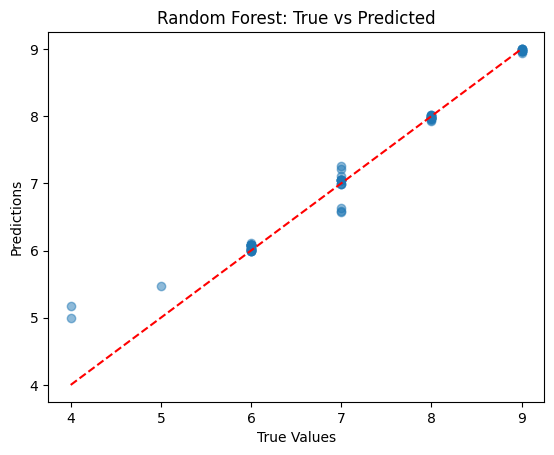

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 理想对角线
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest: True vs Predicted")
plt.show()

### 17. 分析特征重要性
- 重要性高的特征对模型预测影响更大。

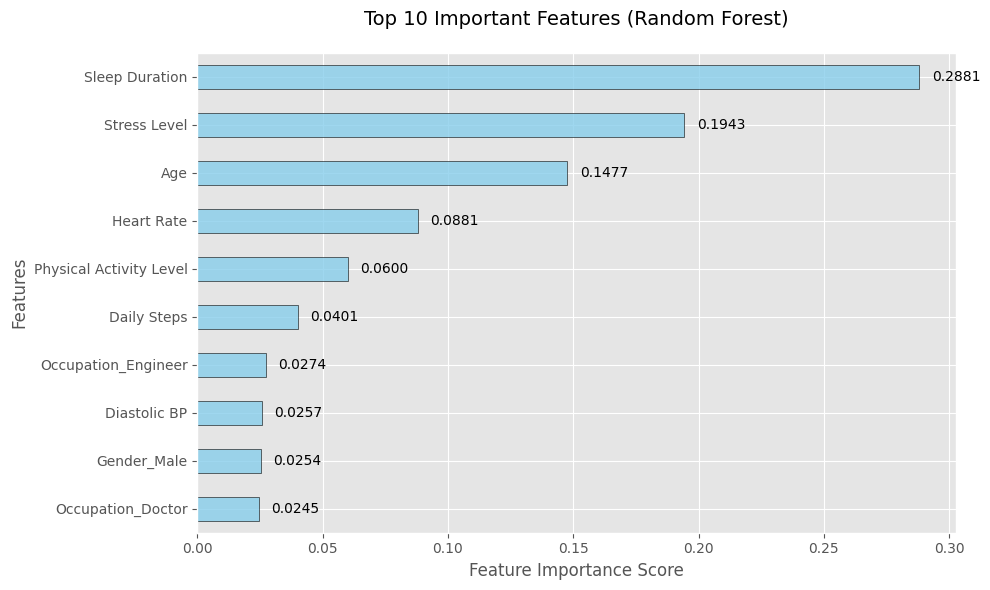

In [15]:
# 获取特征重要性并排序（降序）
feature_importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=True)  # 改为升序，因为横向条形图从下往上显示

# 取前10个最重要的特征
top_10_features = feature_importances.tail(10)

# 设置图形大小和风格
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')  # 使用更美观的样式

# 绘制横向条形图
ax = top_10_features.plot(
    kind='barh',          # 横向条形图
    color='skyblue',      # 条形颜色
    edgecolor='black',    # 边框颜色
    alpha=0.8            # 透明度
)

# 在条形末端标注数值
for i, v in enumerate(top_10_features):
    ax.text(
        v + 0.005,       # x坐标（数值稍偏移）
        i,               # y坐标（对应条形位置）
        f"{v:.4f}",      # 显示4位小数
        color='black',
        ha='left',       # 水平对齐（左对齐）
        va='center'      # 垂直对齐（居中）
    )

# 添加标题和标签
plt.title('Top 10 Important Features (Random Forest)', fontsize=14, pad=20)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# 调整布局
plt.tight_layout()
plt.show()

**结果解读**：

**特征排名最高的当属睡眠时长，但是这属结果并不是原因，原因应从第二项开始寻找。**
1. Stress Level（压力水平）
重要性分数: 0.1943

- 解读:

 - 最强的预测因子，表明压力水平对睡眠质量影响最大。

 - 压力越高，睡眠质量通常越差（入睡困难、易醒等）。

 - 建议：优先干预压力管理（如冥想、规律作息）。

2. Age（年龄）
重要性分数: 0.1477

- 解读:

 - 年龄增长可能伴随睡眠结构变化（如深度睡眠减少）。

3. Heart Rate（心率）
重要性分数: 0.0881

- 解读:

 - 静息心率高可能与压力、焦虑或健康问题相关，间接影响睡眠。

4. Physical Activity Level（身体活动水平）
重要性分数: 0.0600

- 解读:

 - 适度运动可改善睡眠，但过度运动可能导致兴奋性增加。

5. Daily Steps（每日步数）
重要性分数: 0.0401

- 解读:

 - 步数少可能反映久坐，与睡眠质量负相关。

## 第五步：策略建议

1. Stress Level（压力水平） | 重要性最高 (0.1943)

干预策略：
- 压力管理训练

 - 推行每日10-15分钟正念冥想（如使用Headspace或Calm等APP）。

 - 开设职场压力管理课程，重点教学时间管理和任务优先级划分。

- 环境优化

 - 建议睡前1小时启动"数字排毒"（禁用电子设备，蓝光会抑制褪黑素分泌）。

 - 卧室布置采用舒缓色调（如淡蓝/浅绿），温度保持在18-22℃。

- 专业支持

 - 对高压人群（如医护人员、IT从业者）提供心理咨询服务。

监测指标：
每周压力自评量表（PSS-10）得分变化，结合可穿戴设备的心率变异性（HRV）数据。

2. Age（年龄） | 重要性次高 (0.1477)

分年龄段策略：
- 年轻人（<30岁）

 - 纠正熬夜行为：设置"睡眠打卡"激励机制（如达标奖励）。

 - 控制咖啡因摄入（下午3点后禁咖啡因）。

- 中年人（30-50岁）

 - 针对夜间易醒问题，建议补充镁剂（如甘氨酸镁）改善睡眠连续性。

 - 筛查睡眠呼吸暂停（尤其BMI>25人群）。

- 老年人（>50岁）

 - 白天保证30分钟日光照射，调节昼夜节律。

 - 午睡限制在20分钟内，避免影响夜间睡眠。

监测指标：
睡眠分期数据（通过手环监测深睡眠比例），年龄分层统计改善效果。

3. Heart Rate（心率） | 重要性第三 (0.0881)

干预策略：
- 心血管健康管理

 - 静息心率>80bpm者，推荐有氧运动（如快走、游泳）每周150分钟。

 - 呼吸训练：每天2次4-7-8呼吸法（吸气4秒→屏息7秒→呼气8秒）。

- 夜间监测

 - 使用带心率监测的睡眠追踪器，预警异常夜间心动过速。

监测指标：
晨起静息心率趋势，睡眠期间平均心率同比下降值。

4. Physical Activity Level（身体活动水平） | (0.0600)

科学运动方案：
- 运动类型

 - 优先选择瑜伽、太极等低冲击运动（改善睡眠效果优于高强度间歇训练）。

 - 阻抗训练安排在睡前6小时以上。

- 运动时机

 - 最佳运动时段：下午4-7点（与核心体温自然下降节律同步）。

- 个性化调整

 - 对久坐人群采用渐进式目标（从每日500步递增到8000步）。

监测指标：
运动后睡眠潜伏期（入睡时间）缩短比例，深睡眠时长增幅。

5. Daily Steps（每日步数） | (0.0401)

行为干预：
- 职场整合

 - 推行"站立会议"，设置办公桌踏步机。

 - 每工作1小时触发5分钟步行提醒。

- 社区支持

 - 组建步行小组（社交属性提升坚持率），使用微信步数排行榜激励。

- 家庭环境

 - 建议晚餐后家庭集体散步15分钟（兼具消化助眠和家庭关系促进）。

监测指标：
步数与睡眠效率（实际睡眠时间/床上总时间）的相关性系数。

### 数据来源

- ‌数据集名称‌：Health and Sleep relation
- ‌数据来源‌：Kaggle(https://www.kaggle.com/datasets/orvile/health-and-sleep-relation-2024)